In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('BeerWineLiquor.csv')

In [3]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [4]:
#formating data

In [5]:
df.columns = ['ds','y']

In [6]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [7]:
df['ds'] = pd.to_datetime(df['ds'])

In [8]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [9]:
m =Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\arjun\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [10]:
future = m.make_future_dataframe(periods=36,freq='MS')

In [12]:
future.tail()

,ds
355,2021-08-01
356,2021-09-01
357,2021-10-01
358,2021-11-01
359,2021-12-01


In [13]:
forecast =m.predict(future)

In [15]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
355,2021-08-01,5395.137264,5262.897262,5589.291118,5367.835232,5419.583524,39.630426,39.630426,39.630426,39.630426,39.630426,39.630426,0.0,0.0,0.0,5434.767690
356,2021-09-01,5411.292671,5105.721194,5454.602488,5382.326798,5437.362036,-127.940803,-127.940803,-127.940803,-127.940803,-127.940803,-127.940803,0.0,0.0,0.0,5283.351868
357,2021-10-01,5426.926935,5224.198308,5548.222602,5396.824943,5454.229561,-46.033681,-46.033681,-46.033681,-46.033681,-46.033681,-46.033681,0.0,0.0,0.0,5380.893254
358,2021-11-01,5443.082342,5342.980411,5678.213883,5411.068453,5471.827559,67.461210,67.461210,67.461210,67.461210,67.461210,67.461210,0.0,0.0,0.0,5510.543552
359,2021-12-01,5458.716606,6391.821589,6719.815406,5425.574933,5487.910379,1088.227504,1088.227504,1088.227504,1088.227504,1088.227504,1088.227504,0.0,0.0,0.0,6546.944110


In [16]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
348,2021-01-01,4840.211359,4668.239073,4995.018173
349,2021-02-01,4812.720759,4645.357319,4974.216768
350,2021-03-01,5122.573495,4955.574938,5284.443695
351,2021-04-01,5129.316709,4966.824953,5294.439210
352,2021-05-01,5391.246958,5234.837847,5546.301566
353,2021-06-01,5375.016521,5201.210257,5532.096983
354,2021-07-01,5512.335228,5357.789749,5680.196272
355,2021-08-01,5434.767690,5262.897262,5589.291118
356,2021-09-01,5283.351868,5105.721194,5454.602488
357,2021-10-01,5380.893254,5224.198308,5548.222602


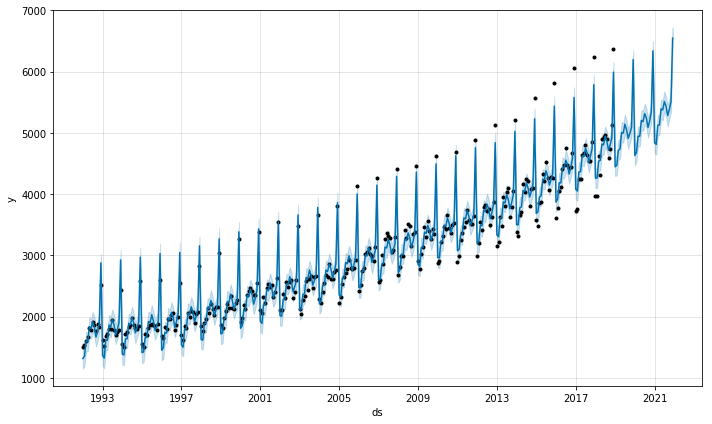

In [18]:
m.plot(forecast);